#                     Analysing the algorithms' performances on the test data

After tuning the parameters, the algorithms are run on 9 months of 10 minute data from 4 currency pairs. 
The results are shown and analyzed below:

In [1]:
#Libraries and helper functions
import pickle
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from toolz import get_config, get_all_config_results, get_monthly_ga_results

currency_pairs = ['EUR_GBP', 'GBP_CHF', 'GBP_USD', 'EUR_USD']
cfg = get_config('../config/testing_config.json')

Gathering the data:

In [2]:
# GA
ga = get_monthly_ga_results(cfg)
ga_mean_performance = pd.pivot_table(ga, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)

# CSFLA
csfla = get_all_config_results(cfg, '../config/algos/csfla.json')
csfla_mean_performance = pd.pivot_table(csfla, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)

#PSO
pso = get_all_config_results(cfg, '../config/algos/pso.json')
pso_mean_performance = pd.pivot_table(pso, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)

# Fitness value per currency per month

In [8]:
currs = pd.DataFrame()
currs = pd.concat(ga.loc[ga['currency'] == curr][['config name', 'month', 'value', 'currency']] for curr in ga['currency'].unique())
currs = currs.append(pd.concat(pso.loc[pso['currency'] == curr][['config name', 'month', 'value', 'currency']] for curr in pso['currency'].unique()))
currs = currs.append(pd.concat(csfla.loc[csfla['currency'] == curr][['config name', 'month', 'value', 'currency']] for curr in csfla['currency'].unique()))

In [9]:
currs.set_index(['currency', 'month', 'config name' ]).unstack()

value                    
config name         csfla        ga       pso
currency month                               
EUR_GBP  201309  0.000139 -0.002245  0.000080
         201310  0.000509 -0.000994  0.000513
         201311 -0.000119 -0.000172 -0.000058
         201312  0.000050 -0.001162 -0.000022
         201401 -0.001615 -0.000134 -0.000639
         201402 -0.000595 -0.000131  0.000179
         201403  0.000126 -0.001268  0.000160
         201404  0.000088 -0.000198  0.000030
         201405 -0.002282 -0.000000 -0.001900
EUR_USD  201309  0.000152  0.000005  0.000504
         201310  0.000293 -0.028596  0.001161
         201311 -0.000134  0.000093 -0.000126
         201312 -0.000545  0.000409 -0.000519
         201401 -0.000397 -0.000560 -0.000572
         201402  0.000449  0.000269  0.000612
         201403  0.000376 -0.000165  0.000008
         201404  0.000446  0.000847  0.002097
         201405 -0.002886 -0.000148 -0.003921
GBP_CHF  201309  0.000337  0.000019  0.000356
         201310 -0.000182  0.003995 -0.000051
         201311  0.000208  0.000185  0.000069
         201312 -0.000417  0.000408 -0.000577
         201401  0.000066 -0.001057 -0.000001
         201402 -0.000425  0.000076 -0.000402
         201403 -0.000177  0.000222 -0.000413
         201404  0.000336  0.001153  0.000631
         201405  0.000026 -0.003915  0.000058
GBP_USD  201309  0.006447  0.002146  0.007464
         201310 -0.000335 -0.001716 -0.000218
         201311  0.000324  0.001762 -0.000180
         201312  0.000028 -0.000108  0.000060
         201401 -0.000733 -0.006753 -0.000941
         201402 -0.002219  0.000038 -0.002025
         201403 -0.000389  0.002211  0.000163
         201404  0.001859  0.000772  0.002086
         201405  0.000050 -0.002153  0.000318

In [11]:
def plot_month(month, title=""):
    ax = plt.plot(month['ga'], label='ga')
    ax = plt.plot(month['pso'], label='pso')
    ax = plt.plot(month['csfla'], label='csfla')
    plt.legend()
    plt.title(title)

# Seasonal fitness 
The following plots represent each algorithm's average performance on each currency pair for each month:

### September

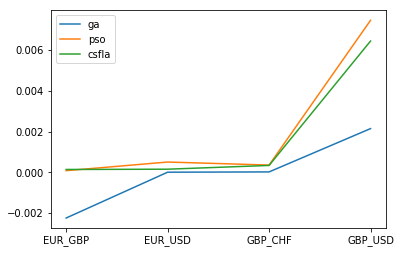

In [12]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201309']['value'])

### October

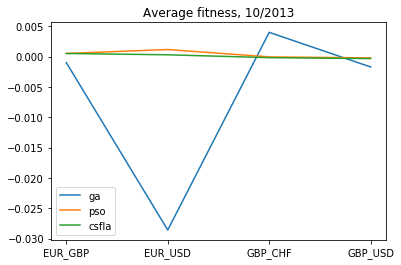

In [13]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201310']['value'], 'Average fitness, 10/2013')

### November

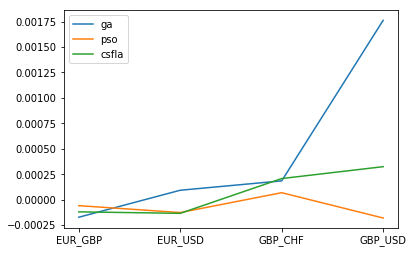

In [14]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201311']['value'])

### December

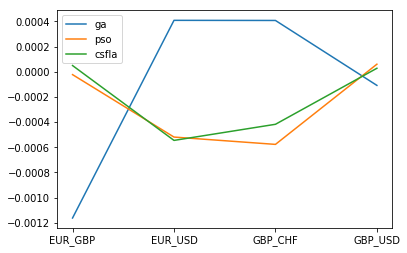

In [15]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201312']['value'])

### January

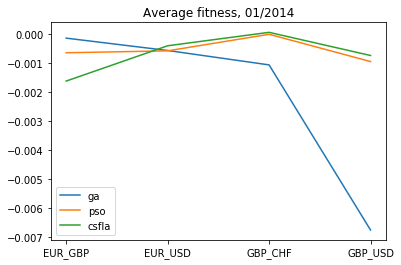

In [16]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201401']['value'], 'Average fitness, 01/2014')

### February

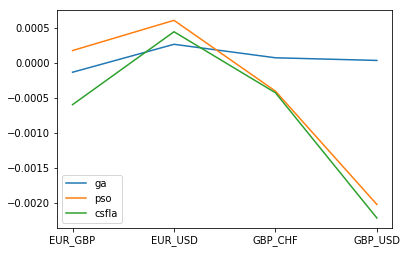

In [17]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201402']['value'])

### March

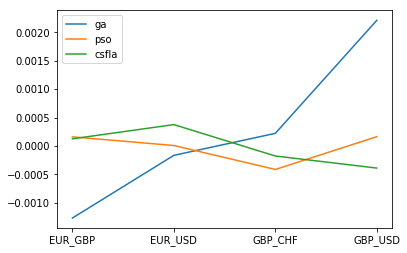

In [18]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201403']['value'])

### April

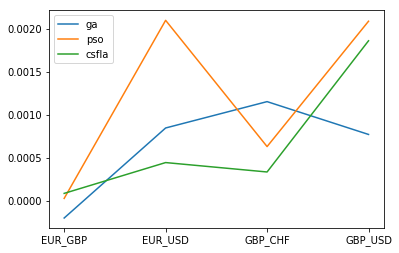

In [19]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201404']['value'])

### May

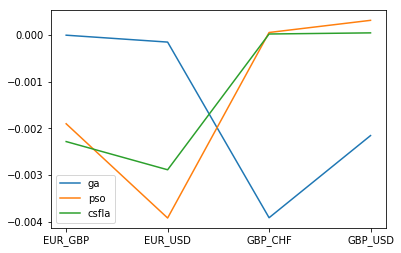

In [20]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201405']['value'])

Some interesting points can be seen in these results:

PSO and CSFLA seem to have very correlated results. This is strange considering that they are two very different algorithms. 

However this is good because it can __complement the DC algorithm on some months.__

It looks like if for some months, the PSO/CSFLA and GA are inversely correlated (eg 201405, 201312, 201310). This is often a good thing if one wants to do ensembling to __get the best out of both algorithms__


We can also see that __PSO/CSFLA tend to be less variant__ in some months (eg 201309, 201310, 201311, 201401 ,201403) across currencies.

# Average Fitness value per currency

In [21]:
mean_fitness_by_currency = pd.concat(pd.DataFrame({
        'name': cfg,
        'currency': curr,
        'value': currs.loc[(currs['currency'] == curr) & (currs['config name'] == cfg) ]['value'].mean()}
        for cfg in currs['config name'].unique())
        for curr in currs['currency'].unique()).set_index(['currency', 'name'])
mean_fitness_by_currency

value
currency name           
EUR_GBP  ga    -0.000700
         pso   -0.000184
         csfla -0.000411
GBP_CHF  ga     0.000121
         pso   -0.000037
         csfla -0.000025
GBP_USD  ga    -0.000422
         pso    0.000748
         csfla  0.000559
EUR_USD  ga    -0.003094
         pso   -0.000084
         csfla -0.000250

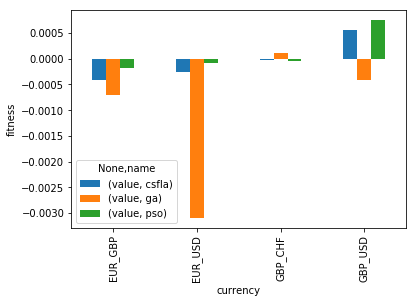

In [22]:
ax = mean_fitness_by_currency.unstack().plot(kind='bar').set_ylabel("fitness")

What stands out for this graph, to me, is that the GA performs very poorly, in terms of average fitness, except for the GBP_CHF currency.

We could thus seperate the GA to use it only on that strategy, or if we ensemble the algorithms, attribute more weight to the ga for that currency, and less on the other currencies.

In [61]:
mean_fitness_by_currency.groupby(['name'])['value'].mean()

name
csfla   -0.000032
ga      -0.001024
pso      0.000111
Name: value, dtype: float64

We can see that on average, only the PSO yields positive fitness, and the GA yields the lowest mean fitness, by far.

# Returns analysis

In [23]:
rets = pd.concat(ga.loc[ga['currency'] == curr][['config name', 'month', 'ret', 'currency']] for curr in ga['currency'].unique())
rets = rets.append(pd.concat(pso.loc[pso['currency'] == curr][['config name', 'month', 'ret', 'currency']] for curr in pso['currency'].unique()))
rets = rets.append(pd.concat(csfla.loc[csfla['currency'] == curr][['config name', 'month', 'ret', 'currency']] for curr in csfla['currency'].unique()))

In [24]:
mean_return_by_currency = pd.concat(pd.DataFrame({
        'name': cfg,
        'currency': curr,
        'return': rets.loc[(rets['currency'] == curr) & (rets['config name'] == cfg) ]['ret'].mean()}
        for cfg in rets['config name'].unique())
        for curr in rets['currency'].unique()).set_index(['currency', 'name'])
mean_return_by_currency

return
currency name           
EUR_GBP  ga    -0.000510
         pso   -0.000016
         csfla -0.000219
GBP_CHF  ga     0.000352
         pso    0.000100
         csfla  0.000109
GBP_USD  ga    -0.000025
         pso    0.000966
         csfla  0.000809
EUR_USD  ga    -0.002381
         pso    0.000103
         csfla -0.000109

We can see that:
    - PSO is nearly always profitable
    - pso and csfla are remarkably performing on the GBP_USD
    - GA is remarkably performing on the GBP_CHG pair

In [25]:
mean_return_by_currency.groupby(['name'])['return'].sum()

name
csfla    0.000589
ga      -0.002564
pso      0.001153
Name: return, dtype: float64

In [26]:
mean_return_by_currency.groupby(['name'])['return'].mean()

name
csfla    0.000147
ga      -0.000641
pso      0.000288
Name: return, dtype: float64

Text(0,0.5,'return')

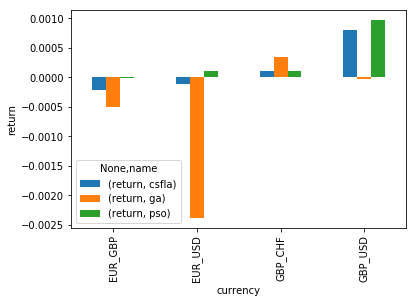

In [27]:
ax = mean_return_by_currency.unstack().plot(kind='bar')
ax.set_ylabel("return")

Here my analysis is the same as for the fitness.
However, we can see additionnaly that:
    - PSO is the best performing on average accross all currencies
    - PSO has very high average returns on the GBP_USD pair
    - GA has very low return on the EUR_USD pair
    - GA outperforms pso/csfla only on the GBP_CHF pair

# MDD analysis

In [28]:
mdds = pd.concat(ga.loc[ga['currency'] == curr][['config name', 'month', 'mdd', 'currency']] for curr in ga['currency'].unique())
mdds = mdds.append(pd.concat(pso.loc[pso['currency'] == curr][['config name', 'month', 'mdd', 'currency']] for curr in pso['currency'].unique()))
mdds = mdds.append(pd.concat(csfla.loc[csfla['currency'] == curr][['config name', 'month', 'mdd', 'currency']] for curr in csfla['currency'].unique()))

In [29]:
mean_mdd_by_currency = pd.concat(pd.DataFrame({
        'name': cfg,
        'currency': curr,
        'mdd': mdds.loc[(mdds['currency'] == curr) & (mdds['config name'] == cfg) ]['mdd'].mean()}
        for cfg in mdds['config name'].unique())
        for curr in mdds['currency'].unique()).set_index(['currency', 'name'])
mean_mdd_by_currency

mdd
currency name           
EUR_GBP  ga     0.000953
         pso    0.000843
         csfla  0.000961
GBP_CHF  ga     0.001157
         pso    0.000681
         csfla  0.000670
GBP_USD  ga     0.001986
         pso    0.001093
         csfla  0.001248
EUR_USD  ga     0.003568
         pso    0.000936
         csfla  0.000702

In [30]:
pd.DataFrame({
            'csfla': mdds.groupby(['config name'])['mdd'].mean()['csfla'],
            'pso': mdds.groupby(['config name'])['mdd'].mean()['pso'],
            'ga': mdds.groupby(['config name'])['mdd'].mean()['ga']},
            index=['mean mdd'])

,csfla,pso,ga
mean mdd,0.000895,0.000888,0.001916


We can see that on average, the PSO and CSFLA produce __half__ as much MDD as the GA. 

This means that we can clearly say that the __PSO and CSFLA produce much less risky strategies that the GA.__

# Seasonal MDD

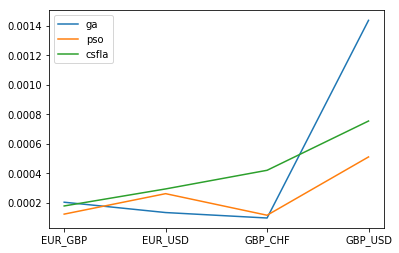

In [31]:
plot_month(mdds.set_index(['month', 'currency', 'config name' ]).unstack().loc['201311']['mdd'])

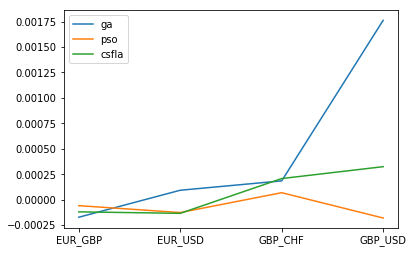

In [32]:
plot_month(currs.set_index(['month', 'currency', 'config name' ]).unstack().loc['201311']['value'])

In [58]:
means = mean_mdd_by_currency.join(mean_return_by_currency.join(mean_fitness_by_currency))
# Sum of meaned returns
means.groupby(['name'])['return'].sum()

name
csfla    0.000589
ga      -0.002564
pso      0.001153
Name: return, dtype: float64

In [55]:
means.groupby(['name']).max()

,mdd,return,value
name,,,
csfla,0.001248,0.000809,0.000559
ga,0.003568,0.000352,0.000121
pso,0.001093,0.000966,0.000748


Here we can see that 
    - PSO produces the highest return out of all currency pairs (on the GPB_USD pair)
    - the GA produces the lowest max return, and the highest max MDD

## Export data for friedman test


In [5]:
all_data = pd.concat([ga, pso, csfla], sort=False)
csv = all_data.reset_index().pivot_table(index='data file', columns='config name', values='value')
csv.to_csv('../tests/friedman_fitness_test_data.csv', sep=',')

In [7]:
all_data = pd.concat([ga, pso, csfla], sort=False)
csv = all_data.reset_index().pivot_table(index='data file', columns='config name', values='ret')
csv.to_csv('../tests/friedman_return_test_data.csv', sep=',')

In [6]:
all_data = pd.concat([ga, pso, csfla], sort=False)
csv = all_data.reset_index().pivot_table(index='data file', columns='config name', values='mdd')
csv.to_csv('../tests/friedman_mdd_test_data.csv', sep=',')

# RECAP

Some overall performance indicators:
### Overall return per strategy

In [8]:
pd.DataFrame(all_data.reset_index().pivot_table(index='data file', columns='config name', values='ret').sum())

,0
config name,
csfla,0.005303
ga,-0.023077
pso,0.010381


We can see that over the 4 currency pairs:
    - the ga yields negative returns
    - the CSFLA yields positive returns
    - the PSO yields the most returns

### Average MDD per strategy

In [9]:
pd.DataFrame(all_data.reset_index().pivot_table(index='data file', columns='config name', values='mdd').mean())

,0
config name,
csfla,0.000895
ga,0.001916
pso,0.000888


We can see that over the 4 currency pairs:
    - the GA yields the highest mean MDD
    - the CSFLA and PSO yield nearly half as much MDD as the GA

### Average variance in return per strategy

In [41]:
pd.DataFrame(all_data.reset_index().pivot_table(index='data file', columns='config name', values='ret').var())

,0
config name,
csfla,0.000002
ga,0.000018
pso,0.000003


We can see that over the 4 currency pairs:
    - the GA yields the most variant results by far
    - the CSFLA and PSO yield consistant results

# Conclusion

My final interpretation of these results is that, 

### Considering that:
    
    In terms of Fitness value: 
        - The PSO is the only algorithm that yields positive mean fitness
        - The PSO and CSFLA perform on average and in terms of fitness much higher than the GA
        
    In terms of Returns:
        - PSO is the best performing on average accross all currencies
        - PSO has very high average returns on the GBP_USD pair
        - GA has very low return on the EUR_USD pair
        - GA outperforms pso/csfla only on the GBP_CHF pair
        
    In terms of MDD:
        - the CSFLA and PSO yield nearly half as much MDD as the GA
    
    In terms of variance:
        - the GA yields much more variant results than the PSO and CSFLA
        
### I conclude that:


On average , __the PSO is the most interesting algorithm to tune the trading strategy__:
        - It yields the highest mean return and fitness
        - It yields the less MDD

__For the risk averse trader , the PSO is even more interesting__:
        - It is low in variance in terms of results
        - It yields positive returns on 3/4 currency pairs
        - It returns near-zero returns on the remaining currency pair
        - It yields the lowest amount of MDD
        
__The GA should be used on a single currency pair portfolio__ (GBP_CHF)

__The PSO could be used with great returns on the GBP_USD currency pair__

__A strategy combining the GA__ on the GBP_CHF pair, __and the PSO__ on the EUR_GBP, EUR_USD, GBP_USD __would be the most profitable__
    

__The CSFLA could serve as a reinforcing strategy for the PSO__ For example, if a decision proposed by the PSO is to be questioned, the decision of the CSFLA could be taken into consideration